In [ ]:
!pip install opendatasets

## Importing Dataset

In [ ]:
import opendatasets as od

In [ ]:
url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuragacp
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


100%|██████████| 2.70G/2.70G [00:30<00:00, 96.5MB/s]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential

## Data Preprocessing

# Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### To avoid Overshooting Loss function
1.Choose small learning rate default 0.001 here we have taken 0.0001

2.There may be chance of underfitting so increase number of neuron

3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
model=Sequential()

## Building Convolution Layer

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 160s 64ms/step - accuracy: 0.3986 - loss: 2.1311 - val_accuracy: 0.8532 - val_loss: 0.4687
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.8403 - loss: 0.5079 - val_accuracy: 0.9145 - val_loss: 0.2735
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.9084 - loss: 0.2852 - val_accuracy: 0.9363 - val_loss: 0.1973
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9393 - loss: 0.1867 - val_accuracy: 0.9483 - val_loss: 0.1639
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 63ms/step - accuracy: 0.9546 - loss: 0.1392 - val_accuracy: 0.9575 - val_loss: 0.1339
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9640 - loss: 0.1124 - val_accuracy: 0.9565 - val_loss: 0.1421
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 0.9709 - loss: 0.0854 - val_accuracy: 0.9494 - val_loss: 0.1722
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 

## Evaluating Model

In [ ]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9934 - loss: 0.0218


In [ ]:
print(train_loss, train_acc)


0.018656063824892044 0.9941247701644897


In [ ]:
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9717 - loss: 0.0947
0.0955684632062912 0.9718871116638184


## Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.6057898998260498,
  0.8629347681999207,
  0.918358325958252,
  0.9439789652824402,
  0.9584749937057495,
  0.9663845300674438,
  0.9729710221290588,
  0.9772530198097229,
  0.981492280960083,
  0.981961727142334],
 'loss': [1.3372925519943237,
  0.43228161334991455,
  0.2517879009246826,
  0.17253170907497406,
  0.12773610651493073,
  0.10330483317375183,
  0.08253847062587738,
  0.07051736861467361,
  0.057911526411771774,
  0.05749013274908066],
 'val_accuracy': [0.8531755208969116,
  0.9145231246948242,
  0.9363191723823547,
  0.9482699632644653,
  0.9574891924858093,
  0.95652174949646,
  0.9493512511253357,
  0.9671067595481873,
  0.976098358631134,
  0.9718871116638184],
 'val_loss': [0.4687303900718689,
  0.27351024746894836,
  0.19733253121376038,
  0.16392256319522858,
  0.13388457894325256,
  0.14213481545448303,
  0.17223910987377167,
  0.11215373128652573,
  0.07729445397853851,
  0.09556843340396881]}

In [ ]:
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

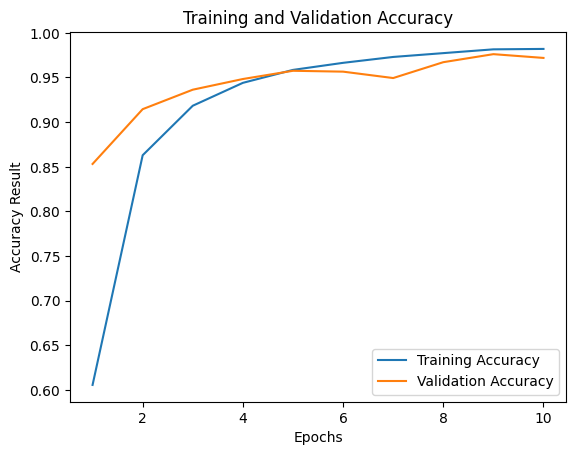

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step


(array([[9.9999845e-01, 7.0772668e-09, 8.8117525e-12, ..., 3.0396121e-17,
         7.8131742e-15, 4.0804667e-13],
        [9.9785137e-01, 3.4995482e-09, 9.2658908e-11, ..., 2.8644079e-14,
         1.6424534e-12, 4.8133289e-11],
        [9.9993598e-01, 2.6002795e-07, 7.0275846e-08, ..., 1.2653958e-11,
         1.9960709e-10, 1.0307055e-08],
        ...,
        [2.6321852e-17, 7.3997526e-21, 1.5447413e-15, ..., 3.5110596e-20,
         1.4737463e-19, 1.0000000e+00],
        [1.5188219e-10, 2.0228334e-13, 6.7265071e-10, ..., 1.4411926e-11,
         3.5449543e-12, 9.9999988e-01],
        [1.4566560e-17, 3.3266256e-21, 2.0713493e-20, ..., 6.1417489e-22,
         7.0383073e-20, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.93      0.98      0.95       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.95      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

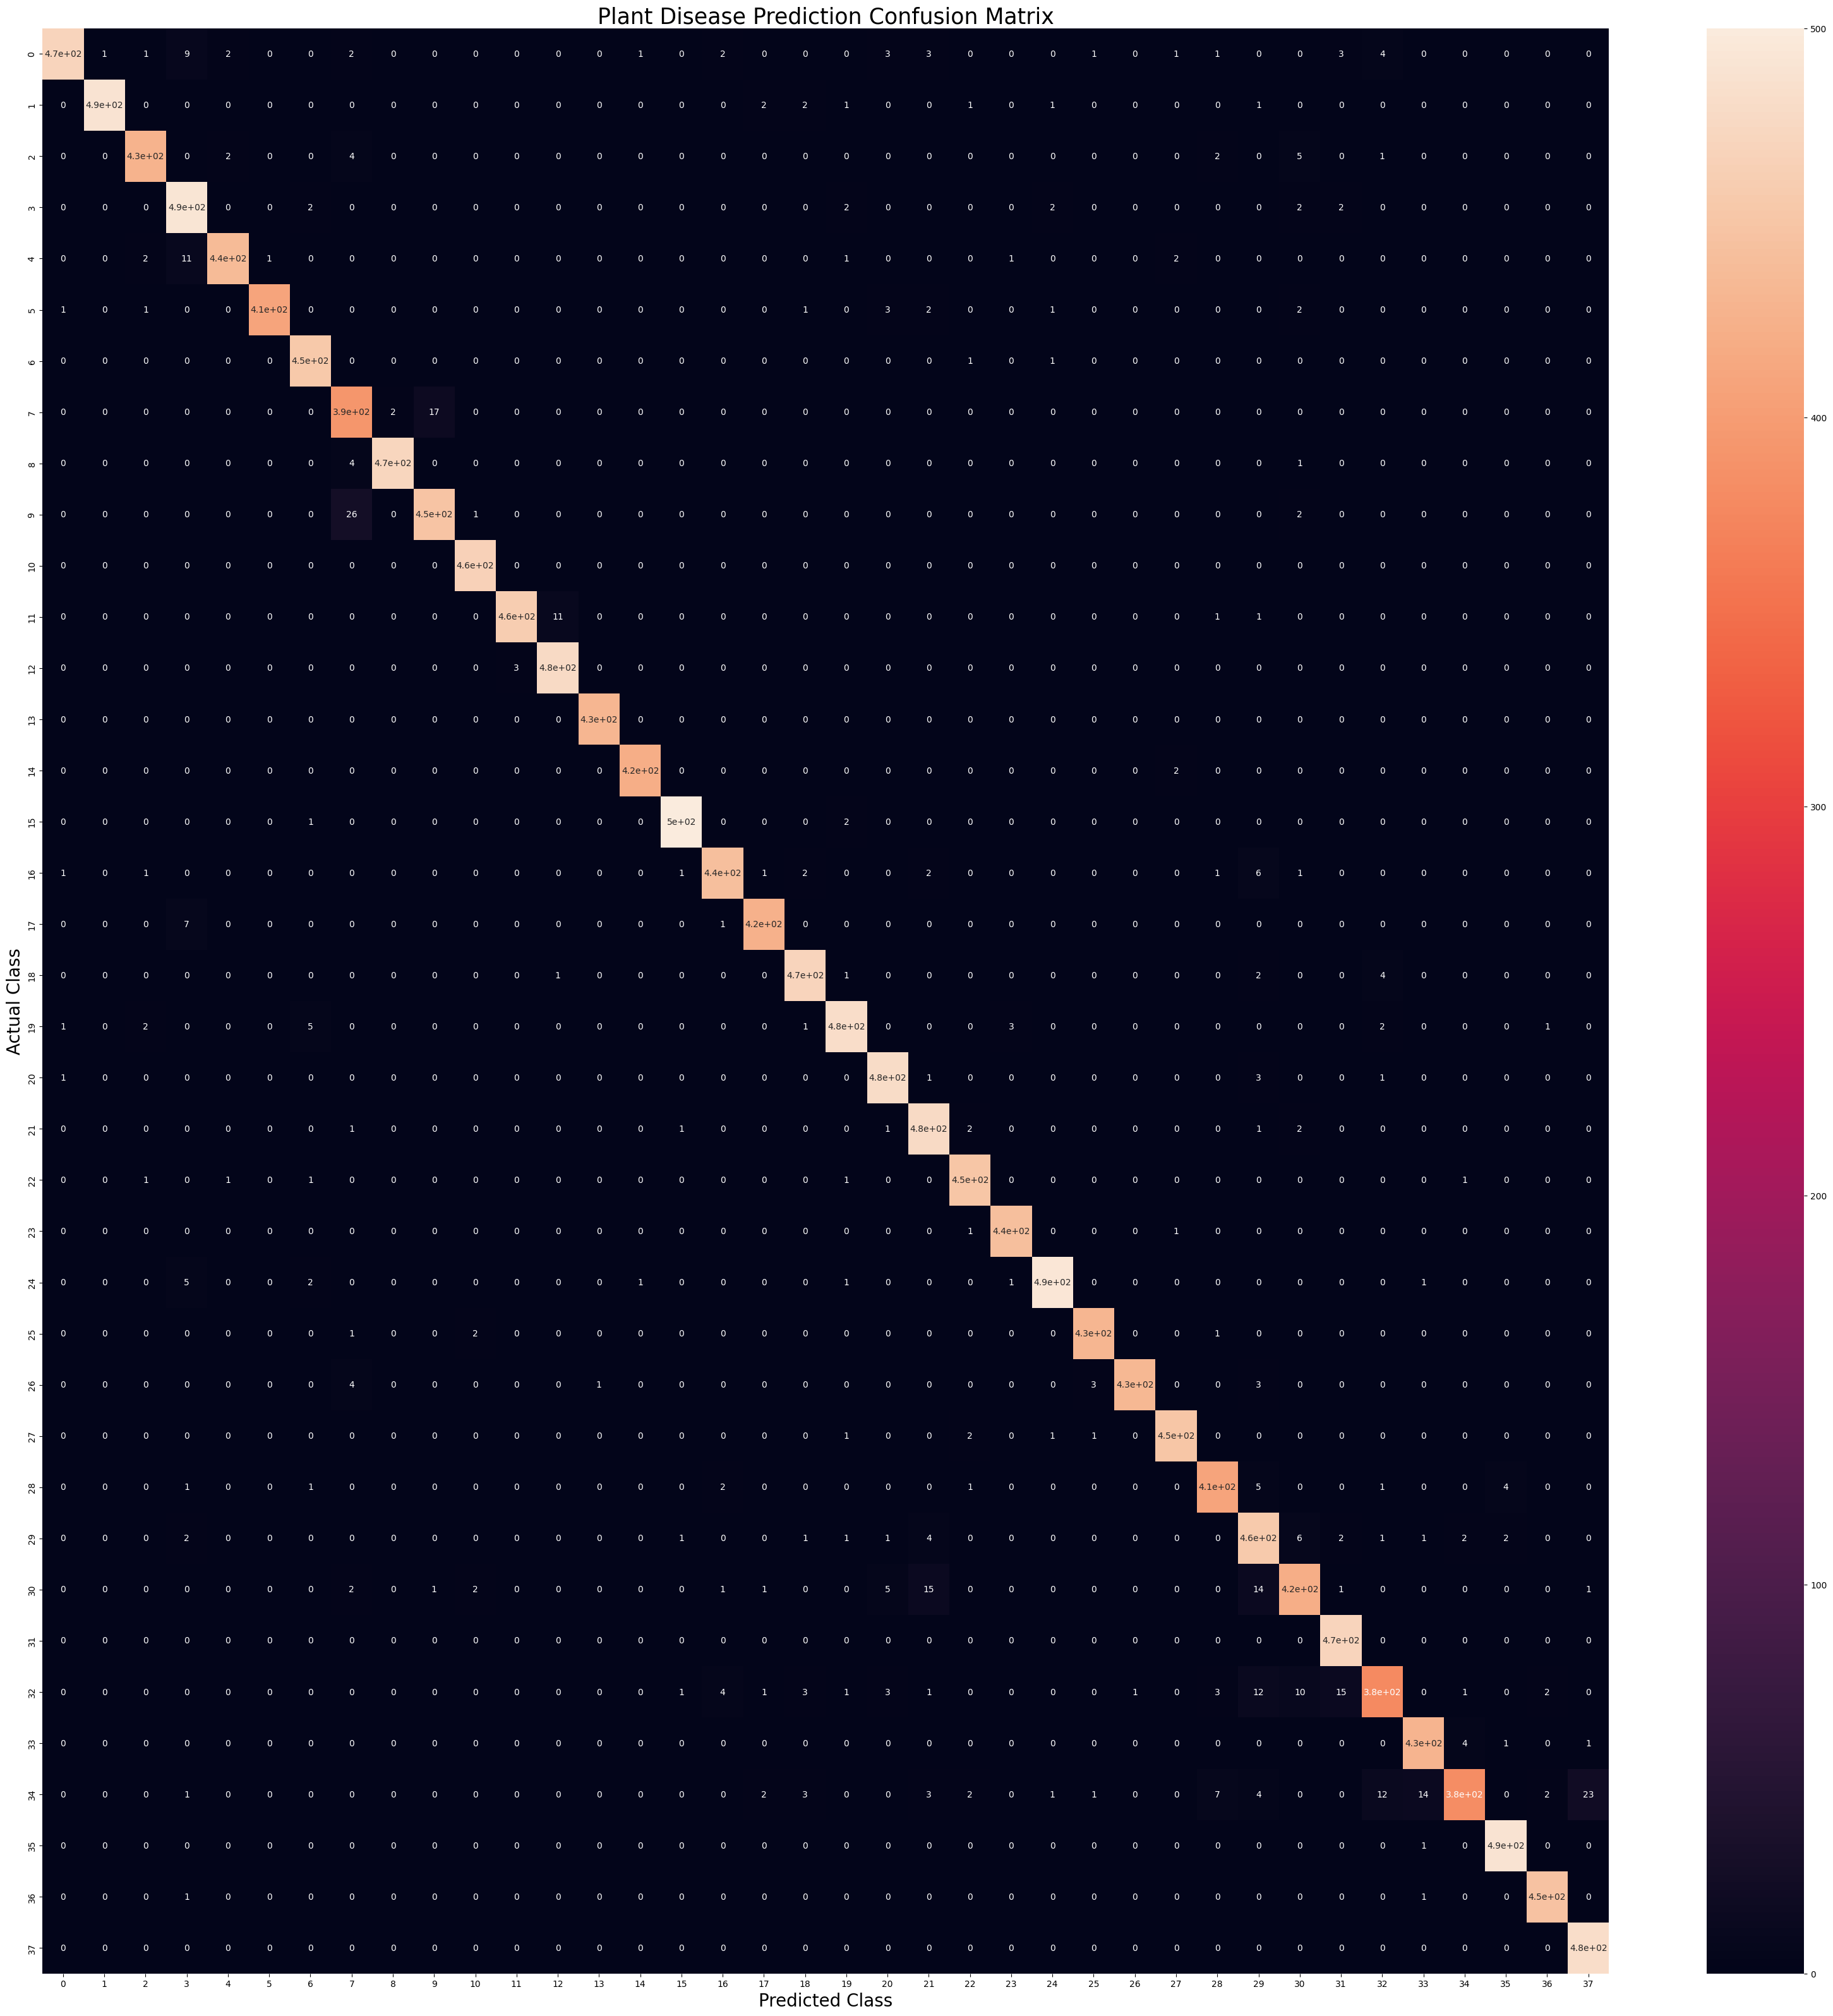

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()